### Importação das bibliotecas

#### Comandos de Instalação:

<p>os - built-in</p>
<p>cv2 - pip install cv2</p>
<p>numpy - pip install numpy</p>
<p>tensorflow - pip install tensorflow</p>
<p>keras - pip install keras</p>
<p>matplotlib - pip install matplotlib</p>

In [27]:
# para lidar com arquivos e diretórios
import os
# para ler e manipular imagens
import cv2 as cv
# para trabalhar com vetores, matrizes, tensores, etc
import numpy as np
# para a rede neural
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

# para a exibição de figuras
from matplotlib import pyplot as plt
%matplotlib inline

#### Definir os caminhos dos conjuntos de dados

<li>É importante que a pasta "dados" esteja no diretório deste arquivo</li>

In [28]:
train_path = './dados/CAPTCHA-10k/treinamento/'
val_path = './dados/CAPTCHA-10k/validacao/'
test_path = './dados/CAPTCHA-10k/teste/'
label_path = './dados/CAPTCHA-10k/labels10k/'

## Dados
### Labels
#### Encontrando labels inválidas, separando e condicionando os conjuntos de treino, validação e teste

In [29]:
### Inicialização das variáveis ###

#contador de arquivos
label_files = 0
#contador de labels com tamanho inesperado
wrong_size = 0
#contador de labels com caracter inesperado
wrong_char = 0
#lista com as possibilidades de saida da rede - util para converter todas as saidas em numero e depois em vetor
out_set = []
#lista com as ids dos arquivos inválidos
invalid = []
#labels do conjunto de treinamento
train_y = []
#labels do conjunto de validação
val_y = []
#labels do conjunto de teste
test_y = []

<p>Após uma análise prévia dos dados, foi notado que haviam exemplos com caracteres não identificados (registrados com "?" nas labels) e também exemplos com número de caracteres diferente de 6.</p>
<p>Foi desenvolivdo um programa para exibir os exemplos com caractere não identificado e oferecer ao usuário a possibilidade de alterar a label pelo terminal. Contudo, estes casos não tem os caracteres bem definidos e não apresentaram uma melhora no resultado da rede, portanto, <b>os exemplos inválidos foram apenas descartados</b></p>

In [30]:
### Processamentos dos arquivos de label ###

#iterar sobre os arquivos da pasta de labels
for txt in os.listdir(label_path):
    #definir id como o nome do arquivo sem a extensão
    _id = txt[:6]
    
    #contar o arquivo
    label_files += 1
    
    #abrir arquivo txt para leitura
    handle = open(label_path+txt, 'r')
    #ler o conteúdo e fechar o arquivo
    content = handle.read()
    handle.close()
    
    #remover a quebra de linha dos arquivos
    content = content.replace('\n', '')
    #verificar se existem arquivos com tamanho inesperado
    if len(content)!=6:
        wrong_size += 1
        #como a label é inválida: adicionar id à lista e passar para a próxima
        invalid.append(_id)
        continue
    
    #verificar se existem caracteres que nao sejam letras ou numeros
    if not content.isalnum():
        wrong_char += 1
        #como a label é inválida: adicionar id à lista e passar para a próxima
        invalid.append(_id)
        continue
    
    #ler cada caracter das labels válidas
    for char in content:
        if not char in out_set:
            out_set.append(char)
        
        if int(_id) <= 8000:
            train_y.append(char)
        elif 8000 < int(_id) <= 9000:
            val_y.append(char)
        elif int(_id) > 9000:
            test_y.append(char)

out_set.sort()

In [31]:
### Gerar pequeno relatório ###
print(f'Foram encontrados {wrong_size} arquivos com tamanho inválido.')
print(f'Foram encontrados {wrong_char} arquivos com caracter inválido.')
print(f'Foram invalidados {len(invalid)} exemplos.')
print(f'Entre os {label_files} arquivos lidos, {label_files-len(invalid)} são válidos.')

Foram encontrados 5 arquivos com tamanho inválido.
Foram encontrados 98 arquivos com caracter inválido.
Foram invalidados 103 exemplos.
Entre os 10000 arquivos lidos, 9897 são válidos.


In [32]:
### Gerar pequeno relatório ###
print(f'Há {len(train_y)/6} conjuntos de treinamento, totalizando {len(train_y)} caracteres')
print(f'Há {len(val_y)/6} conjuntos de validação, totalizando {len(val_y)} caracteres')
print(f'Há {len(test_y)/6} conjuntos de teste, totalizando {len(test_y)} caracteres')
print(f'Total de conjuntos: {len(train_y)/6 + len(val_y)/6 + len(test_y)/6}')
print(f'Total de labels de caracter: {len(train_y) + len(val_y) + len(test_y)}')
print(f'A rede deve ter {len(out_set)} saídas.')

Há 7899.0 conjuntos de treinamento, totalizando 47394 caracteres
Há 999.0 conjuntos de validação, totalizando 5994 caracteres
Há 999.0 conjuntos de teste, totalizando 5994 caracteres
Total de conjuntos: 9897.0
Total de labels de caracter: 59382
A rede deve ter 36 saídas.


#### Converter as saídas para valores numéricos e depois para o formato de vetores categóricos

Este processo é adequado visto que a saída da rede será em vetores de tamanho igual ao número de possíveis classes de saída
<p>A codificação utilizada foi:</p>
<ul>
<li>0 - 9 = 0 - 9</li>
<li>A - Z = 10 - 35</li>
</ul>

In [33]:
# Convertes as saídas para valores numéricos
print("Caractere\tValor numérico correspondente")
for i, out in enumerate(out_set):
    print(f'{out}\t\t{i}')

aux = train_y.copy()
for i, train_label in enumerate(aux):
    train_y[i] = out_set.index(train_label)
print(f'\nAntes: {aux[:10]}')
print(f'Depois: {train_y[:10]}')

aux = val_y.copy()
for i, val_label in enumerate(aux):
    val_y[i] = out_set.index(val_label)
print(f'\nAntes: {aux[:10]}')
print(f'Depois: {val_y[:10]}')

aux = test_y.copy()
for i, test_label in enumerate(aux):
    test_y[i] = out_set.index(test_label)
print(f'\nAntes: {aux[:10]}')
print(f'Depois: {test_y[:10]}')

aux.clear()

Caractere	Valor numérico correspondente
0		0
1		1
2		2
3		3
4		4
5		5
6		6
7		7
8		8
9		9
A		10
B		11
C		12
D		13
E		14
F		15
G		16
H		17
I		18
J		19
K		20
L		21
M		22
N		23
O		24
P		25
Q		26
R		27
S		28
T		29
U		30
V		31
W		32
X		33
Y		34
Z		35

Antes: ['R', 'N', 'I', 'N', 'I', 'C', 'T', 'V', 'C', 'F']
Depois: [27, 23, 18, 23, 18, 12, 29, 31, 12, 15]

Antes: ['H', 'Y', 'R', '3', 'G', 'P', 'E', 'H', 'S', 'L']
Depois: [17, 34, 27, 3, 16, 25, 14, 17, 28, 21]

Antes: ['J', 'W', '4', 'C', 'Z', 'F', 'H', '2', '7', 'L']
Depois: [19, 32, 4, 12, 35, 15, 17, 2, 7, 21]


In [34]:
# converter as saídas esperadas para vetores categóricos.
train_y = np.array(train_y)
val_y = np.array(val_y)
test_y = np.array(test_y)

print(f'Formato inicial (treino): {train_y.shape}')
print(f'Formato inicial (validação): {val_y.shape}')
print(f'Formato inicial (teste): {test_y.shape}')

train_y = np_utils.to_categorical(train_y, 36)
val_y = np_utils.to_categorical(val_y, 36)
test_y = np_utils.to_categorical(test_y, 36)

print(f'\nFormato final (treino): {train_y.shape}')
print(f'Formato final (validação): {val_y.shape}')
print(f'Formato final (teste): {test_y.shape}')

Formato inicial (treino): (47394,)
Formato inicial (validação): (5994,)
Formato inicial (teste): (5994,)

Formato final (treino): (47394, 36)
Formato final (validação): (5994, 36)
Formato final (teste): (5994, 36)


### Inputs
### Processando, separando e condicionando os conjuntos de entrada de treino, validação e teste

#### Função de pré-processamento

Inicialmente, de for intuitiva, a tendência é pensar que que a redução de ruído na imagem gera um melhor resultado na rede, já que, ao olho humano, as letras filtradas ficam com forma e características mais bem definidas. Contudo, após utilizar três arquiteturas de redes neurais artificias diferentes, foi verificado que em todos os testes e comparações, <b>a acurácia para um conjunto de imagens não filtradas, com o ruído original do captcha, é maior do que para o mesmo conjunto com imagens filtradas</b>, quando processados pela mesma rede. Essa diferença se deu tanto nas avaliações por caractere, onde houve diferença mais branda de até 1%, quanto nas avaliações de captcha completo, caso onde a rede treinada com o conjunto não filtrado foi pouco mais de 3% mais acurada em seus resultados.

<p>Não sei exatamente por que isso ocorre, mas minha hipótese é de que a rede aprende a lidar com o ruído, que a matemática por trás do processo de treino é menos sensível a estas imperfeições do que o cérebro humano. Além disso, vale considerar que aparentemente as letras dos captchas possuem a mesma fonte, logo, se desconsiderado o ruído, letras iguais são visualmente indênticas, característica que pode ser perdida no processo de filtragem do ruído, já que há perdas de diversos detalhes e a existência de padrões é relevante.</p>

<p> Mesmo diante desta percepção, considero válido manter a função de filtragem de imagem, afim de possibilitar análises sobre o desempenho da rede para os dois casos e também sobre a qualidade da filtragem. Para definir se o conjunto de entrada da rede será ou não filtrado, a função responsável por criar datasets terá um parâmetro booleano de controle chamado "filtro".</p>

<p>Sobre a abordagem adotada para a filtragem, entre as metodologias testadas, incluindo por exemplo a detecção de contornos e o borramento para priorizar baixas frequências, o conjunto <b>binarização, dilatação e erosão</b> foi a que apresentou melhor resultado do ponto de vista humano do entendimento das letras.</p>

In [35]:
def preProcess(im):
    #binarização da imagem
    _, th = cv.threshold(im, 70, 255, cv.THRESH_BINARY)
    # dilatação e erosão da imagem para retirar ruído
    kernel = np.ones((2, 2))
    dilated = cv.dilate(th, kernel, iterations=2)
    eroded = cv.erode(dilated, kernel, iterations=1)
    
    return eroded

#### Função de criação de dataset

Essa parte do processo consiste em, através do endereço provido, ler as imagens, ignorar as que estão no conjunto de dados inválidos, pré-processar as imagens e por fim separar os caracteres de cada captcha lido.
<p>A separação das letras é feita através da definição de um x inicial, um y mínimo, um y máximo e um passo fixos. O passo representa a largura de cada letra, ou seja, se o passo for igual a 30 temos a primeira letra do x inicial até 30 pixels adiante em x, a segunda letra pelos próximos 30 pixels em x e assim por diante.</p>
<p>Pelos parâmetros definidos, a ultima letra teria largura diferente das outras, por isso ela foi redimensionada. Outra opção testada foi efetuar esse "corte" da última letra alguns pixels antes, igualando sua largura à das outras, contudo, essa abordagem se mostrou mais trabalhosa e não melhorou a performance do modelo.</p>
<p>De forma mais geral, para a separação de letras também foi testada uma abordagem que consistia em uma definição mais específica da posição de cada caractere, mas isso gerava um tipo de "overfitting" causado pela pessoa que definia a bounding box, já que as letras variam um pouco sua posição de exemplo para exemplo nos dados, fazendo com que uma caixa de seleção maior e menos específica deva ser considerada.</p>

In [36]:
### Função para criar um dataset de caractereas a partir do caminho dos dados e lista de ids inválidas ###
def create_dataset(path, inv = [], filtrar = False):
    dataset = []
    # coordenadas de referência para separar as letras
    x0, y0, y1 = 8, 11, 41
    step = 30
    #iterar sobre os arquivos da pasta
    for f_img in os.listdir(path):
        #definir id como o nome do arquivo sem a extensão
        _id = f_img[:6]

        #se o dado tiver sido invalidado no processamento das labels, não será incluido ao dataset
        if _id in inv:
            continue

        #ler a imagem em tons de cinza
        img = cv.imread(path+f_img, 0)
        
        if filtrar:
            #tratar a imagem para reduzir o ruído
            img = preProcess(img)
            print("As imagens de entrada da rede passaram pelo filtro")

        for i in range(5):
            dataset.append(img[y0:y1, x0+i*step:x0+(i+1)*step])
        dataset.append(cv.resize(img[y0:y1, x0+5*step:], (step,y1-y0)))
        
    return dataset

In [37]:
# Criar datasets
train_x = create_dataset(train_path, invalid)
val_x = create_dataset(val_path, invalid)
test_x = create_dataset(test_path, invalid)

In [38]:
print(f'Tamanho do conjunto de treino: {len(train_x)}')
print(f'Tamanho do conjunto de validação: {len(val_x)}')
print(f'Tamanho do conjunto de teste: {len(test_x)}')

Tamanho do conjunto de treino: 47394
Tamanho do conjunto de validação: 5994
Tamanho do conjunto de teste: 5994


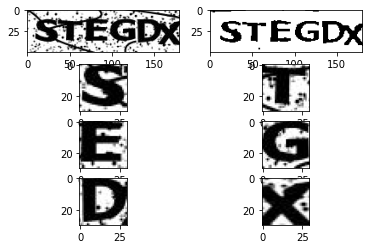

In [39]:
# Visualizar dados
ex_id = 24
example = cv.imread(train_path+'0000'+str(ex_id)+'.jpg', 0)
figure, axes = plt.subplots(4,2)
# imagem de exemplo
axes[0,0].imshow(example, cmap='gray')
# imagem de exemplo filtrada
axes[0,1].imshow(preProcess(example), cmap='gray')
# imagens de caracteres "cortados" da forma como servirão de entrada para a rede
axes[1,0].imshow(train_x[6*(ex_id-1)], cmap='gray')
axes[1,1].imshow(train_x[6*(ex_id-1)+1], cmap='gray')
axes[2,0].imshow(train_x[6*(ex_id-1)+2], cmap='gray')
axes[2,1].imshow(train_x[6*(ex_id-1)+3], cmap='gray')
axes[3,0].imshow(train_x[6*(ex_id-1)+4], cmap='gray')
axes[3,1].imshow(train_x[6*(ex_id-1)+5], cmap='gray')

#### Condicionamento dos dados: tornando-os adequados para a rede
<ul>
    <li>Converter as listas criadas para numpy arrays: permite utilizar os métodos de manipulação da biblioteca</li>
    <li>Converter o formato: adiciona explicitamente a profundidade de cada imagem provida (1 - intensidade luminosa). Após essa etapa o formato de cada dado de entrada da rede fica definido por: (tamanho do conjunto, largura, altura, profundidade)</li>
    <li>Converter explicitamente para o tipo float de 32 bits: uma boa prática para o próximo passo</li>
    <li>Normalizar os valores através da equação: <b>valor_normalizado = (valor - mínimo) / (máximo - mínimo)</b></li>
    com máximo igual a 255 e mínimo igual a 0.
</ul>

In [40]:
# Converter para numpy arrays
train_x = np.array(train_x)
val_x = np.array(val_x)
test_x = np.array(test_x)

In [41]:
# Ajustar o formato incluindo a camada de profundidade da entrada
print('Inicial:',train_x.shape, val_x.shape, test_x.shape)
train_x = train_x.reshape(train_x.shape[0], 30, 30, 1)
val_x = val_x.reshape(val_x.shape[0], 30, 30, 1)
test_x = test_x.reshape(test_x.shape[0], 30, 30, 1)
print('Final:',train_x.shape, val_x.shape, test_x.shape)

Inicial: (47394, 30, 30) (5994, 30, 30) (5994, 30, 30)
Final: (47394, 30, 30, 1) (5994, 30, 30, 1) (5994, 30, 30, 1)


In [42]:
# Converter o tipo
print('Amostra - Inicial:',train_x[10][14:16,22:25])
train_x = train_x.astype('float32')
val_x = val_x.astype('float32')
test_x = test_x.astype('float32')
print('Amostra - Final:',train_x[10][14:16,22:25])

Amostra - Inicial: [[[ 5]
  [ 0]
  [41]]

 [[ 1]
  [22]
  [ 0]]]
Amostra - Final: [[[ 5.]
  [ 0.]
  [41.]]

 [[ 1.]
  [22.]
  [ 0.]]]


In [43]:
# Normalizar os valores de entrada entre 0 e 1
print('Amostra - Inicial:',train_x[10][14:16,22:25])
train_x /= 255
val_x /= 255
test_x /= 255
print('Amostra - Final:',train_x[10][14:16,22:25])

Amostra - Inicial: [[[ 5.]
  [ 0.]
  [41.]]

 [[ 1.]
  [22.]
  [ 0.]]]
Amostra - Final: [[[0.01960784]
  [0.        ]
  [0.16078432]]

 [[0.00392157]
  [0.08627451]
  [0.        ]]]


## Rede Neural
### Construção do modelo

#### Arquitetura da rede

A arquitetura da rede foi definida empiricamente. O ponto de partida foi a rede de exemplo apresentada em aula e, para guiar as alterações, foram estudados modelos na plataforma Kaggle e em artigos relacionados a identificação de caracteres.
<p>No processo de construção da arquitetura da rede, um importante aprendizado foi que tamanho não significa qualidade, visto que entre os muitos modelos testados, alguns possuiam um monte de camadas convolucionais, outros um monte de filtros, e vários levaram horas para serem treinados e, ao final, obter uma taxa de acerto menor do que arquiteturas menos extensas e custosas.</p>

<b>Tipos de camada:</b>
<ul>
    <p><li><b>Convolucional:</b> aplica filtros pelo espaço da entrada da camada e realiza a ativação através de uma função pré definida. A saída de uma camada convolucional é como um mapa que, através dos valores em cada região da saída, indica onde é mais possível que haja presença da característica definida pelo filtro.</li>
    <p><li><b>MaxPooling2D:</b> realiza a redução do tamanho da matriz (pooling) ao fazer com que uma região da entrada, definida pelo tamanho da janela (parâmetro "pool_size"), seja convertida em um único pixel na saída, de valor igual ao máximo da janela. </li>
    <p><li><b>BatchNormalization:</b> baseada no conceito de feature scaling, realiza uma operação de normalização dos dados de entrada, tornando suas escalas semelhantes, assim como foi feito durante a preparação dos conjuntos de entrada, quando os valores das imagens foram normalizados entre 0 e 1.
    <br>Essa abordagem aproxima os intervalos de alcance das variáveis, tornando a função de custo mais simétrica, o que é uma boa prática para encontrar o ponto mínimo mesmo quando utilizando otimizadores adaptativos como o Adam, que possui diferentes taxas de aprendizado para diferentes dimensões. São principais vantagens dessa abordagem: redução do tempo de treino, redução da importancia dos pesos iniciais e, de certa forma, uma contribuição para a regularização do modelo, potencializada pelas camadas de Dropout.</li>
    <p><li><b>Dropout:</b> método de regularização para redes neurais, que tem como principal intuito evitar o overfitting. O Dropout consiste basicamente em multiplicar a ativação de uma parcela dos neurônios da camada por 0 de forma aleatória, o que representa uma inativação temporária dessa parcela de neurônios, o que favorece a distribuição dos pesos e a adaptabilidade dos neurônios para trabalharem com diferentes dados</li>
    <p><li><b>Flatten:</b> transforma a matriz ou tensor de entrada em um vetor, tendo como saída a versão "planificada" da entrada</li>
    <p><li><b>Dense:</b> camadas "densamente conectadas", ou seja, a saída todos os neurônios de uma cama se conectam à entrada de todos os neurônios da proxima camada</li>
</ul>

#### Parâmetros da rede

<b>Camadas Convolucionais:</b>
<ul>
    <p><li>Formato do input: Mesmo formato das imagens dos conjuntos antes criador. Define o formato da entrada da camada, importante para determinar a quantidade de parâmetros e operações que a camada terá. É necessário apenas para a primeira camada já que a entrada das demais depende da saída anterior.</li>
    <p><li>Dimensão das camadas: Valores escolhidos empiricamente. Define a quantidade de filtros convolucionais que serão aplicados à entrada, impactando diretamente na quantidade de parâmetros e operações, que determinam o custo computacional da execução da rede. Também define as dimensões da saída desta camada.</li>
    <p><li>Tamanho do Kernel: Valores escolhidos empiricamente. Define as dimensões da janela deslizante que contém cada filtro convolucional aplicado à entrada no processo de mapeamento de características</li>
    <p><li>Função de Ativação: Escolha baseada em outras redes de propósito semelhante. Define a função que determina a saída da camada a partir do resultado da operação realizada com os pesos e bias</li>
    <p><li>Padding: Escolhido 'same' para evitar a perda de informação nas bordas das imagens, que seria prejudicial ao desempenho da rede, principalmente após várias convoluções com perda de borda.</li>
</ul>
<b>Camadas de Dropout:</b>
<ul>
    <p><li>Taxa de Dropout: Valores escolhidos com base em outras redes de propósito semelhante. Define a taxa de neurônios desativados na camada, logo, um Dropout de 0,25 corresponde à inativação de 25% dos neurônios na camada.</li>
</ul>
<b>Camadas de MaxPooling:</b>
<ul>
    <p><li>Tamanho da janela: Valor escolhido empiricamente. Define o tamanho da janela da qual apenas o pixel de maior valor será representado na saída, consequentemente define também a taxa de redução do tamanho da matriz</li>
</ul>

In [44]:
# Define o modelo como sequencial
model = Sequential()

In [45]:
# Camada de input - exige a definição do formato da entrada
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(30,30,1)))

In [46]:
# hiden layers
model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) #mudar para 32?
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128, (5, 5), padding='same', activation='relu')) #mudar para 32?
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same')) #15/2, tirar?
model.add(BatchNormalization())
model.add(Dropout(0.25))

In [47]:
# fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))

### Visualização da arquitetura da rede

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       204928    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)        

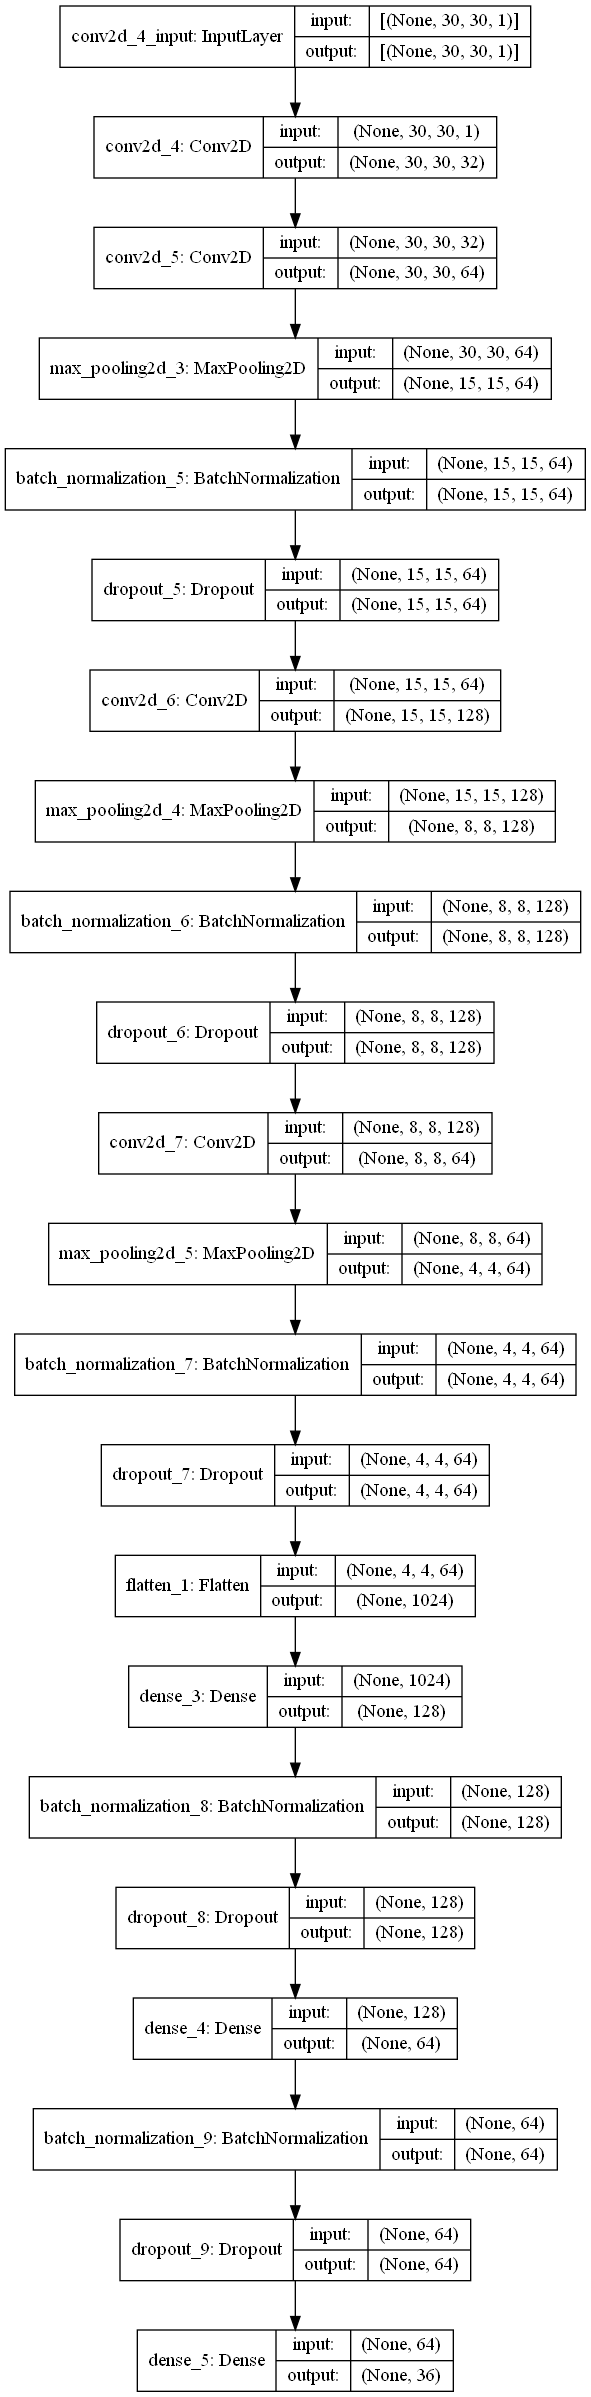

In [49]:
# Plotar arquitetura da rede
plot_model(model, to_file='model.png', show_shapes=True)

In [50]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# Definir um callback para encerrar o treinamento quando verificado que a rede deixou de evoluir
early_stopping_monitor = EarlyStopping(patience=5)

In [53]:
# Treinar modelo
history = model.fit(train_x, train_y, batch_size=100, epochs=2, callbacks=early_stopping_monitor, 
                    validation_data=(val_x, val_y))

Epoch 1/2
474/474 [==============================] - 238s 501ms/step - loss: 0.7561 - accuracy: 0.7911 - val_loss: 0.1842 - val_accuracy: 0.9563
Epoch 2/2
474/474 [==============================] - 227s 480ms/step - loss: 0.3304 - accuracy: 0.9125 - val_loss: 0.1315 - val_accuracy: 0.9643


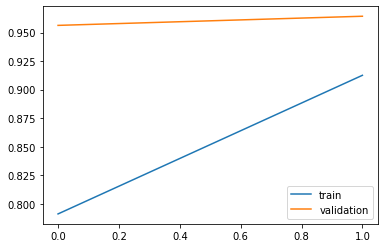

In [54]:
# Visualização do processo de treino e validação
# O gráfico representa a acurácia em função da época ou período de treino
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

## Avaliação do modelo

### Avaliação por caractere com o conjunto de teste

Considera todos os caracteres (6 por captcha) dos exemplos de treino, realizando a predição para cada caractere e, com base no conjunto total de 6 vezes o tamanho do conjunto de treino, calcula a precisão (taxa de acerto de caracteres)

In [55]:
score = model.evaluate(test_x, test_y, verbose=1)

188/188 [==============================] - 6s 30ms/step - loss: 0.1328 - accuracy: 0.9611


### Avaliação por captcha com o conjunto de teste

Considera, ao invés de caracteres por si só, captchas completos, ou seja, conjutos de 6 caracteres. Nesta etapa o mais importante não é a taxa de precisão ou acerto por caractere, mas sim em quantos dos exemplos de teste, conjuntos de 6 caracteres, todos foram corretamente identificados pela rede, pois são nestes exemplos que a rede seria capaz de acertar um teste captcha.

In [56]:
# Fazer predições no conjunto de teste
predicoes = model.predict(test_x)
# Arredondar os valores do vetor para 0 e 1
predicoes = np.round(predicoes)

In [57]:
# Separar as predições por caractere em conjuntos de 6, tendo assim a divisão por captcha
pred_pc = np.array_split(predicoes,999)
y_pc = np.array_split(test_y,999)

#### Inicializar o dicionário com as possibilidades de acerto (1 a 6)

Essa inicialização não seria necessária por conta da utilização do método get no momento de adicionar um dado ao dicionário, mas fazê-la garante a presença de todas as possibilidades, mesmo que não haja tal ocorrência.

por exemplo: se nenhum captcha tem apenas 1 caractere acertado, o 1 não apareceria se não tivesse sido inicializado e sua presença torna mais fácil a geração do gráfico referente ao mínimo de acertos por captcha.

In [58]:
# apc = acertos por captcha
apc = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
for i, captcha in enumerate(pred_pc):
    correct = 0
    for j, letter in enumerate(captcha):
        if np.array_equal(letter, y_pc[i][j]):
            correct += 1
    apc[correct] = apc.get(correct, 0) + 1

In [59]:
for key in apc:
     apc[key] = round(apc[key]/9.99, 1)
    
print(apc)

{1: 0.0, 2: 0.0, 3: 0.0, 4: 1.9, 5: 21.5, 6: 76.6}


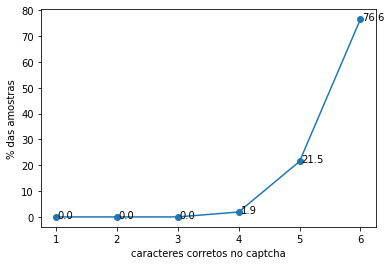

In [60]:
# Gerar gráfico de caracteres corretos por captcha
y_plot = apc.values()
plt.plot(range(1,7), y_plot, '-o')
plt.xlabel('caracteres corretos no captcha')
plt.ylabel('% das amostras')

for i, value in enumerate(y_plot):
    plt.annotate(value, (i+1.03, list(y_plot)[i]-0.5))

plt.show()

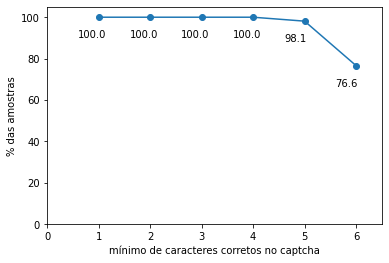

In [61]:
# Gerar gráfico com o mínimo de caracteres corretos
y_plot2 = []
for i in range(6):
    y_plot2.append(sum(list(y_plot)[i:]))

plt.plot(range(1,7), y_plot2, '-o')
plt.axis([0, 6.5, 0, 105])
plt.xlabel('mínimo de caracteres corretos no captcha')
plt.ylabel('% das amostras')

for i, value in enumerate(y_plot2):
    plt.annotate(value, (i+0.6, list(y_plot2)[i]-10))

plt.show()

## Exibir exemplos da predição

Essa etapa consiste em uma visualização dos exemplos de teste junto com a predição para estes exemplos feita pela rede neural desenvolvida.

In [62]:
# Converter a saída de vetores para strings
print("Formato inicial:", pred_pc[0])
pred_comp = []
for captcha in pred_pc:
    aux = ''
    for charactere in captcha:
        val = np.argmax(charactere)
        aux += out_set[val]
    pred_comp.append(aux)
    
print("\nFormato final:", pred_comp[:10])    

Formato inicial: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Formato final: ['JW4CZF', 'H27LCM', '1EF8W0', 'HZ1HQE', '97CZ9Z', 'G0FGKA', 'RYM1Q7', 'ZR0R95', 'XYPVYT', 'VW0E5P']


<ipython-input-63-2574206bb326>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1,2)


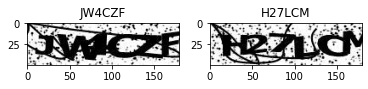

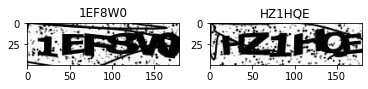

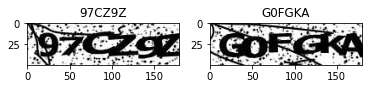

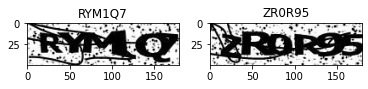

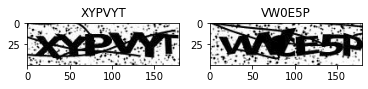

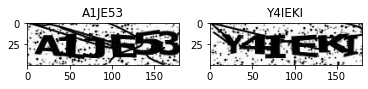

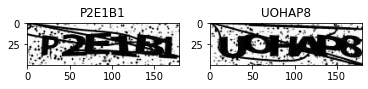

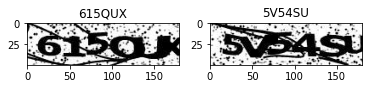

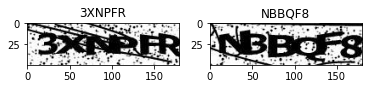

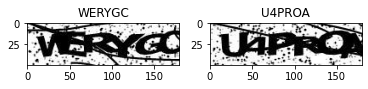

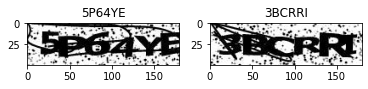

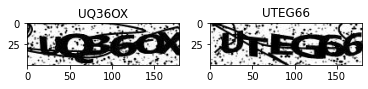

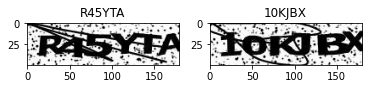

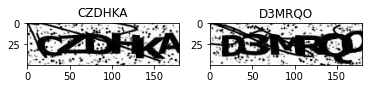

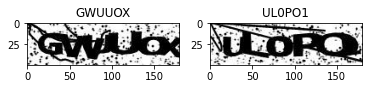

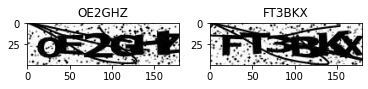

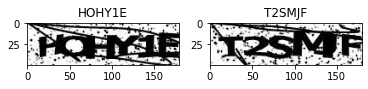

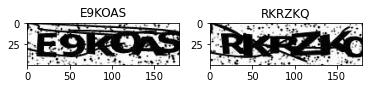

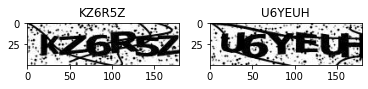

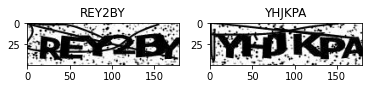

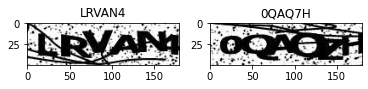

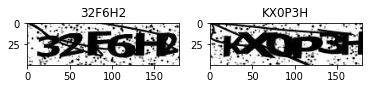

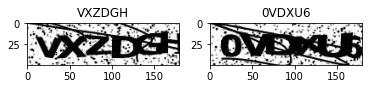

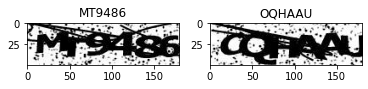

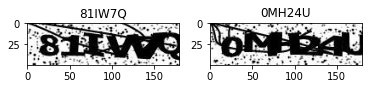

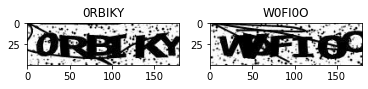

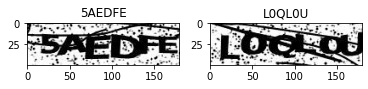

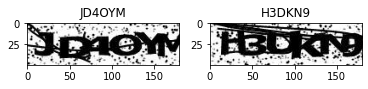

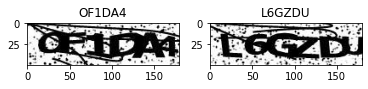

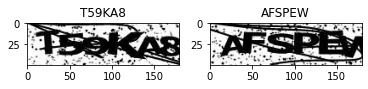

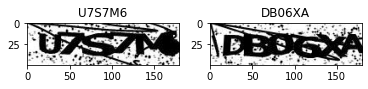

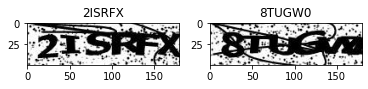

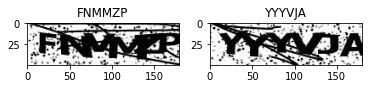

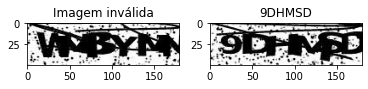

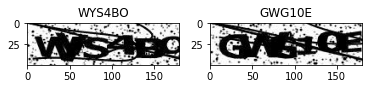

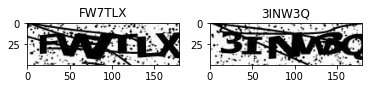

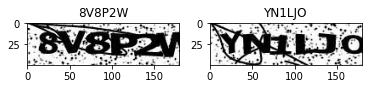

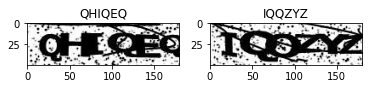

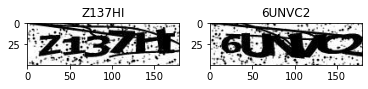

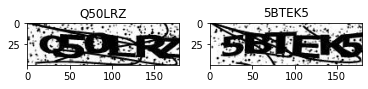

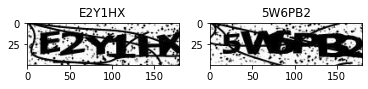

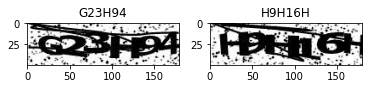

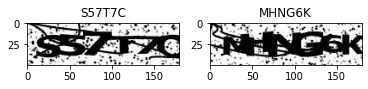

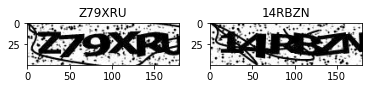

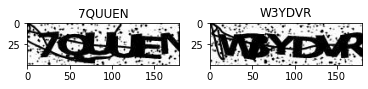

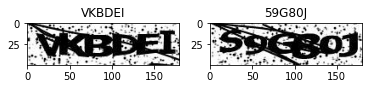

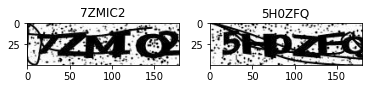

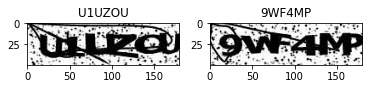

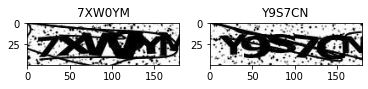

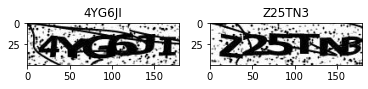

In [63]:
# Fazer o plot de alguns exemplos de teste junto com a predição da rede para os caracteres de cada um
# O código leva em consideração e cria um caso específico para o exemplo inválido do conjunto
captchas = os.listdir(test_path)
inv_seen = 0
for i in range(50):
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(cv.imread(test_path+captchas[i*2]), cmap='gray')
    if i==33:
        axes[0].set_title('Imagem inválida')
        inv_seen +=1
    else:
        axes[0].set_title(pred_comp[i*2-inv_seen])
    axes[1].imshow(cv.imread(test_path+captchas[i*2+1]), cmap='gray')
    axes[1].set_title(pred_comp[i*2+1-inv_seen])